Best alpha: 0.1
MSE: 13407525.381757835
R2 Score: 0.830164143751985


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


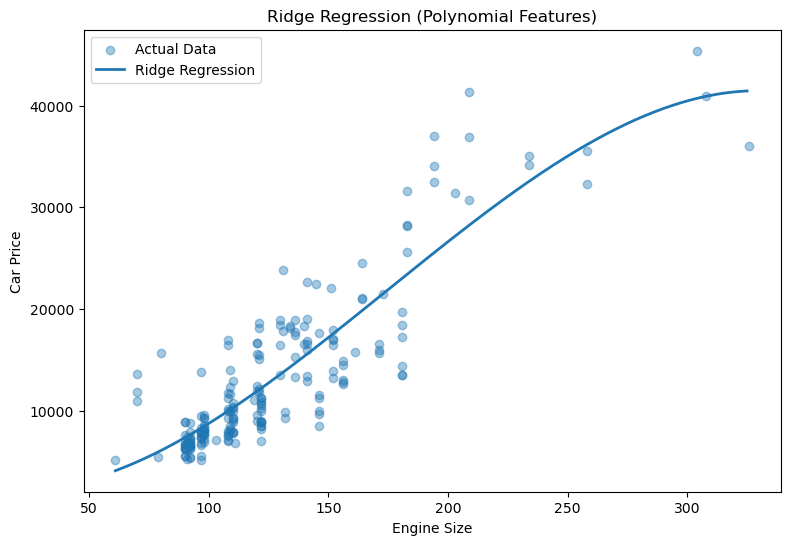

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# ----------------------------
# 1. Load Dataset
# ----------------------------
data = pd.read_csv('/Users/toshitha/Downloads/archive (3)/CarPrice_Assignment.csv')

X = data[['enginesize']]   # 2D input
y = data['price']

# ----------------------------
# 2. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 3. Polynomial Features
# ----------------------------
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# ----------------------------
# 4. Feature Scaling (IMPORTANT)
# ----------------------------
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# ----------------------------
# 5. Ridge Regressionwith Cross-Validation
# ----------------------------
alphas = np.arange(0.1, 10.0, 0.05)
ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train_poly, y_train)

# ----------------------------
# 6. Evaluation
# ----------------------------
y_pred = ridge.predict(X_test_poly)

print("Best alpha:", ridge.alpha_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ----------------------------
# 7. Plot Ridge Curve
# ----------------------------
X_grid = np.arange(X.min().values[0], X.max().values[0], 1).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)
X_grid_poly = scaler.transform(X_grid_poly)

plt.figure(figsize=(9,6))
plt.scatter(X, y, alpha=0.4, label="Actual Data")
plt.plot(X_grid, ridge.predict(X_grid_poly),
         label="Ridge Regression", linewidth=2)

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Ridge Regression (Polynomial Features)")
plt.legend()
plt.show()


Best alpha: 0.1
MSE: 13407525.381757835
R2 Score: 0.830164143751985


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124441592.48983026, tolerance: 831965.687322519
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 836067.9924471378, tolerance: 831965.687322519
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 856394.6978518963, tolerance: 831965.687322519
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: 

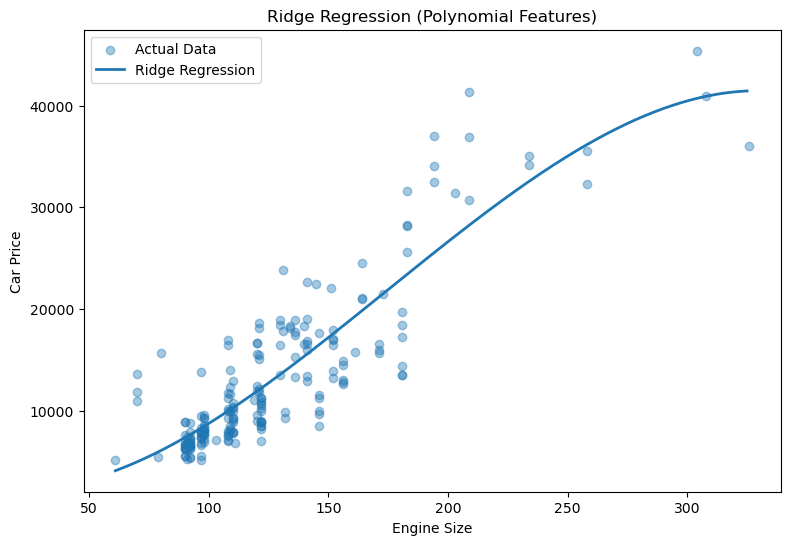

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# ----------------------------
# 1. Load Dataset
# ----------------------------
data = pd.read_csv('/Users/toshitha/Downloads/archive (3)/CarPrice_Assignment.csv')

X = data[['enginesize']]   # 2D input
y = data['price']

# ----------------------------
# 2. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 3. Polynomial Features
# ----------------------------
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# ----------------------------
# 4. Feature Scaling (IMPORTANT)
# ----------------------------
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# ----------------------------
# 5. Ridge Regression with Cross-Validation
# ----------------------------
alphas = np.arange(0.1, 10.0, 0.05)
lasso = LassoCV(alphas=alphas)
lasso.fit(X_train_poly, y_train)

# ----------------------------
# 6. Evaluation
# ----------------------------
y_pred = ridge.predict(X_test_poly)

print("Best alpha:", ridge.alpha_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ----------------------------
# 7. Plot Ridge Curve
# ----------------------------
X_grid = np.arange(X.min().values[0], X.max().values[0], 1).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)
X_grid_poly = scaler.transform(X_grid_poly)

plt.figure(figsize=(9,6))
plt.scatter(X, y, alpha=0.4, label="Actual Data")
plt.plot(X_grid, ridge.predict(X_grid_poly),
         label="Ridge Regression", linewidth=2)

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Ridge Regression (Polynomial Features)")
plt.legend()
plt.show()
